In [5]:
import pyscreenshot as ImageGrab
import time
import cv2
import csv
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np


In [6]:
def image_collecting(label):
    images_folder = f"captured_images/{label}/"
    print("Draw image...")

    for i in range(0, 10):
        time.sleep(8)
        im = ImageGrab.grab(bbox = (60,250,500,750))
        print("Saved image ", i)
        im.save(images_folder + str(i) + ".png")
        print("Draw next image...")

In [7]:
header = ["label"]
for i in range (0, 28*28):
    header.append("pixel"+str(i))

with open("dataset.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range (10):
    dirlist = glob.glob("archive (2)/"+str(label)+"/*.jpg")

    for imgpath in dirlist:
        im = cv2.imread(imgpath)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (5,5), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)
        rows, cols = roi.shape

        for i in range (rows):
            for j in range (cols):
                k = roi[i,j]
                if k>200:
                    k = 1
                else:
                    k = 0

                data.append(k)
        with open ("dataset.csv", "a") as f:
            writer = csv.writer(f)
            writer.writerow(data)



KeyboardInterrupt: 

In [47]:
data = pd.read_csv("dataset.csv")
data = shuffle(data)

1


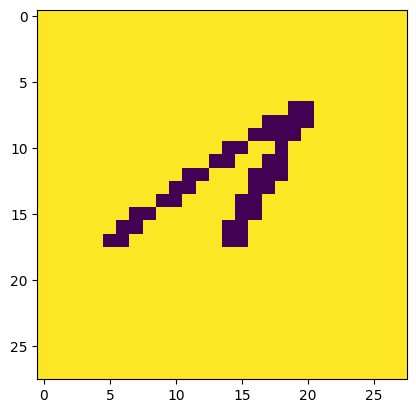

In [48]:
X = data.drop(["label"], axis=1)
y = data["label"]
idx = 4000
img = X.loc[idx].values.reshape(28,28)
print(y.loc[idx])
plt.imshow(img)

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier = SVC(kernel='linear', random_state=6)
classifier.fit(train_X, train_y)
joblib.dump(classifier, 'model/digit_recognition_classifier.pkl')

['model/digit_recognition_classifier.pkl']

In [50]:
prediction = classifier.predict(test_X)
print("Accuracy: ", accuracy_score(test_y, prediction))

Accuracy:  0.5455810716771051


In [3]:
model = joblib.load("model/digit_recognition_classifier.pkl")
image_folder = "img/"
feature_names = X.columns
while(True):
    time.sleep(2)

    img = ImageGrab.grab(bbox=(60,300,500,800))
    im = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    _, th = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    coords = cv2.findNonZero(th)
    x, y, w, h = cv2.boundingRect(coords)
    roi = th[y:y+h, x:x+w]
    roi = cv2.resize(roi, (28,28), interpolation=cv2.INTER_AREA)

    X_input = [(1 if p > 0 else 0) for p in roi.flatten()]
    X_pred = pd.DataFrame([X_input], columns=feature_names)

    pred = model.predict(X_pred)[0]
    print("Prediction:", pred)

    cv2.putText(im, f"Prediction: {pred}", (20,40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    cv2.imshow("Result", im)

    if cv2.waitKey(1) == 13:
        break

cv2.destroyAllWindows()


NameError: name 'joblib' is not defined